In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_excel(r"merged_scored_dataset1.xlsx")

# Convert the target variable based on the given conditions
data['flag'] = 3
data.loc[data['Laboratory confirmed, since the beginning of the pandemic Hospitalized'] <= 449, 'flag'] = 2
data.loc[data['Laboratory confirmed, since the beginning of the pandemic Hospitalized'] <= 290, 'flag'] = 1



In [2]:
# Drop the columns that exist in the dataset and ignore any errors for columns not found
columns_to_drop = ['District', 'Recovery Rate', 'Cluster','Hospitalization Rate']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Split the data into training and test sets
X = data.drop(columns=['Laboratory confirmed, since the beginning of the pandemic Hospitalized', 'flag'])
y = data['flag']

train_data_flag, test_data_flag, y_train_flag, y_test_flag = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
mean_flag = train_data_flag.mean(axis=0)
std_flag = train_data_flag.std(axis=0)
train_data_flag = (train_data_flag - mean_flag) / std_flag
test_data_flag = (test_data_flag - mean_flag) / std_flag

# train_data_flag.head(), y_train_flag.head()  # Displaying the preprocessed training data for review


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

# Model Building
model_flag = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_data_flag.shape[1],)),
    layers.Dropout(0.2), #to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # We have 3 classes (1, 2, 3), but due to indexing, it's better to set this to 4 and ignore the 0th index
])

model_flag.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

#model training
history_flag = model_flag.fit(train_data_flag, y_train_flag, epochs=100, batch_size=32, validation_split=0.2)


# Display training history for review
# history_flag.history


Epoch 1/100
334/334 [==============================] - 0s 996us/step - loss: 0.5573 - accuracy: 0.7511 - val_loss: 0.3972 - val_accuracy: 0.8121
Epoch 2/100
334/334 [==============================] - 0s 781us/step - loss: 0.3932 - accuracy: 0.8187 - val_loss: 0.3504 - val_accuracy: 0.8394
Epoch 3/100
334/334 [==============================] - 0s 772us/step - loss: 0.3567 - accuracy: 0.8359 - val_loss: 0.3216 - val_accuracy: 0.8477
Epoch 4/100
334/334 [==============================] - 0s 804us/step - loss: 0.3205 - accuracy: 0.8525 - val_loss: 0.2982 - val_accuracy: 0.8649
Epoch 5/100
334/334 [==============================] - 0s 770us/step - loss: 0.3009 - accuracy: 0.8630 - val_loss: 0.2705 - val_accuracy: 0.8735
Epoch 6/100
334/334 [==============================] - 0s 776us/step - loss: 0.2873 - accuracy: 0.8686 - val_loss: 0.2496 - val_accuracy: 0.8888
Epoch 7/100
334/334 [==============================] - 0s 758us/step - loss: 0.2689 - accuracy: 0.8828 - val_loss: 0.2375 - val_ac

334/334 [==============================] - 0s 760us/step - loss: 0.0634 - accuracy: 0.9764 - val_loss: 0.0486 - val_accuracy: 0.9839
Epoch 58/100
334/334 [==============================] - 0s 761us/step - loss: 0.0632 - accuracy: 0.9760 - val_loss: 0.0626 - val_accuracy: 0.9760
Epoch 59/100
334/334 [==============================] - 0s 768us/step - loss: 0.0643 - accuracy: 0.9743 - val_loss: 0.0455 - val_accuracy: 0.9835
Epoch 60/100
334/334 [==============================] - 0s 770us/step - loss: 0.0656 - accuracy: 0.9742 - val_loss: 0.0454 - val_accuracy: 0.9835
Epoch 61/100
334/334 [==============================] - 0s 758us/step - loss: 0.0634 - accuracy: 0.9734 - val_loss: 0.0500 - val_accuracy: 0.9820
Epoch 62/100
334/334 [==============================] - 0s 763us/step - loss: 0.0591 - accuracy: 0.9773 - val_loss: 0.0604 - val_accuracy: 0.9809
Epoch 63/100
334/334 [==============================] - 0s 784us/step - loss: 0.0631 - accuracy: 0.9761 - val_loss: 0.0514 - val_accuracy

In [4]:
# Evaluate the model on the test set
loss, accuracy = model_flag.evaluate(test_data_flag, y_test_flag)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
"""
Don't use this result in the presentation
"""

105/105 [==============================] - 0s 444us/step - loss: 0.0400 - accuracy: 0.9847
Test Loss: 0.04001433029770851
Test Accuracy: 0.9847305417060852


"\nDon't use this result in the presentation\n"

In [5]:
# Computing Other Metrics (Precision, Recall, F1-score)
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def print_classification_report(test_data_x, test_data_y):
    # Predict the classes
    y_pred = model_flag.predict(test_data_x)
    y_pred_classes = tf.argmax(y_pred, axis=1)
    report = classification_report(test_data_y, y_pred_classes)

    # Calculate overall metrics
    accuracy = accuracy_score(test_data_y, y_pred_classes)
    precision = precision_score(test_data_y, y_pred_classes, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
    recall = recall_score(test_data_y, y_pred_classes, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
    f1 = f1_score(test_data_y, y_pred_classes, average='weighted')  # You can use 'micro', 'macro', or 'weighted'

    # Print or use the values as needed
    print("########### evaluation matrices on original test data ###########")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
print_classification_report(test_data_flag, y_test_flag)

105/105 [==============================] - 0s 427us/step
########### evaluation matrices on original test data ###########
Accuracy: 0.9847305389221557
Precision: 0.9850063068273068
Recall: 0.9847305389221557
F1 Score: 0.9847439933976011


105/105 [==============================] - 0s 419us/step


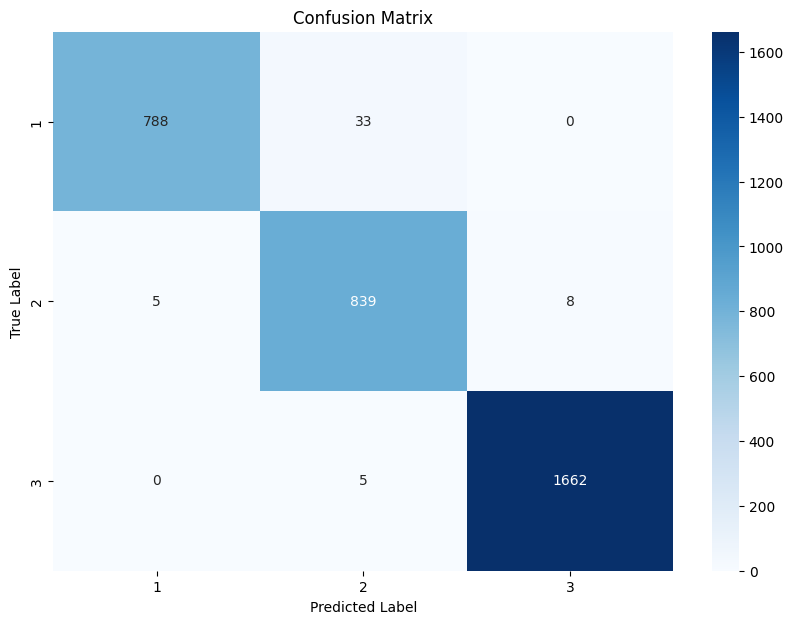

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the classes
y_pred = model_flag.predict(test_data_flag)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_flag, y_pred_classes, labels=[1, 2, 3])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


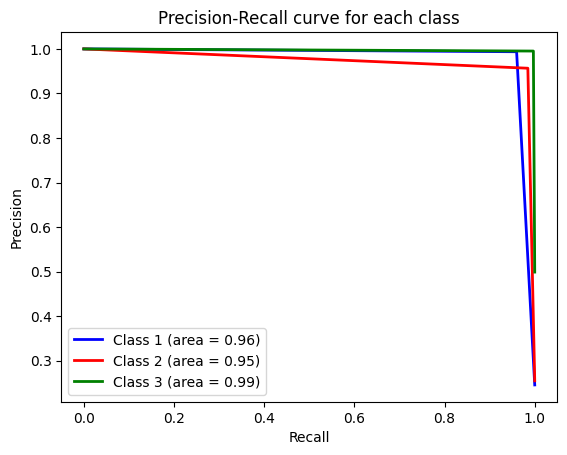

In [7]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test_flag, classes=[1, 2, 3])
y_pred_bin = label_binarize(y_pred_classes, classes=[1, 2, 3])

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])

# Plot
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Class {0} (area = {1:0.2f})'.format(i+1, average_precision[i]))
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for each class')
plt.legend(loc="best")
plt.show()


/var/folders/cn/w8xb_bw55sb_vsg2gg2xb17w0000gn/T/ipykernel_24713/267713568.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Actual', data=df_visual, ax=axes[0], palette='viridis')
/var/folders/cn/w8xb_bw55sb_vsg2gg2xb17w0000gn/T/ipykernel_24713/267713568.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted', data=df_visual, ax=axes[1], palette='viridis')


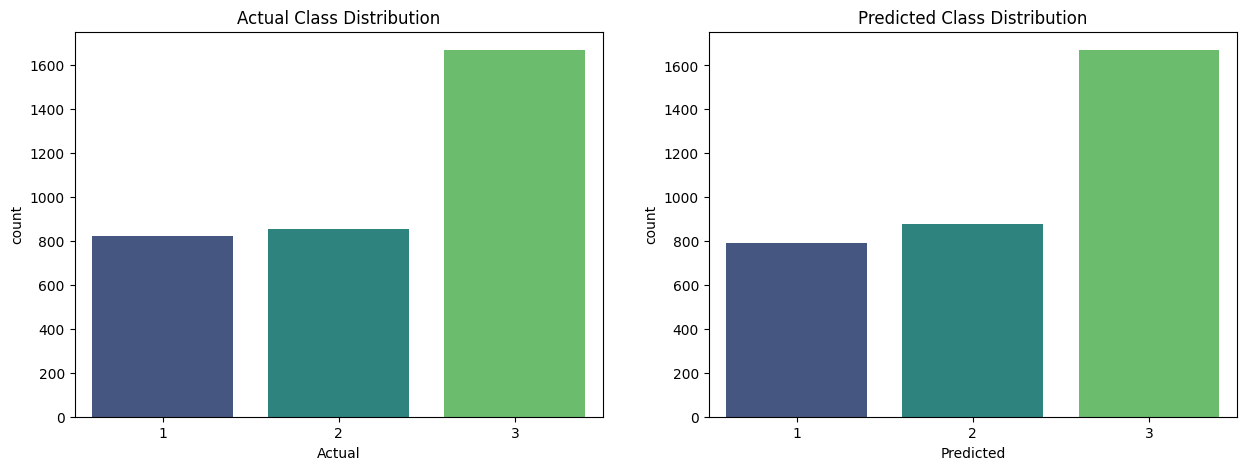

In [8]:
# Create a DataFrame for visualization
df_visual = pd.DataFrame({
    'Actual': y_test_flag,
    'Predicted': y_pred_classes
})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='Actual', data=df_visual, ax=axes[0], palette='viridis')
axes[0].set_title('Actual Class Distribution')

sns.countplot(x='Predicted', data=df_visual, ax=axes[1], palette='viridis')
axes[1].set_title('Predicted Class Distribution')

plt.show()


In [9]:
#!pip install adversarial-robustness-toolbox

In [10]:
# from art.estimators.classification import TensorFlowV2Classifier
# from art.attacks.evasion import ShadowAttack

# # As we have a TensorFlow model
# classifier = TensorFlowV2Classifier(
#     model=model_flag,  # trained model
#     nb_classes=3,  # Number of output classes
#     input_shape=(train_data_flag.shape[1],),  # Input shape
#     clip_values=(0, 1)  # Assuming pixel values between 0 and 1, adjust if different
# )

# # Create the Shadow Attack instance
# attack = ShadowAttack(estimator=classifier)
# # Generate adversarial examples for each sample in the test data
# x_test_adv = []

# for sample in test_data_flag.values:
#     adversarial_sample = attack.generate(x=sample.reshape(1, -1))
#     x_test_adv.append(adversarial_sample)

# x_test_adv = np.vstack(x_test_adv)  # Convert the list of adversarial samples to a numpy array

# # Evaluate the model on the adversarial examples
# loss, accuracy = model_flag.evaluate(x_test_adv, y_test_flag)
# print(f"Accuracy on adversarial samples: {accuracy:.4f}")


# Generate adversarial examples
#x_test_adv = attack.generate(x=test_data_flag)




In [11]:
#!pip uninstall scikit-learn adversarial-robustness-toolbox
#!pip install scikit-learn adversarial-robustness-toolbox


In [12]:
#import art
#art.__version__


In [13]:
#help(ShadowAttack)


In [14]:
from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import FastGradientMethod

# define the classifier using ART
classifier = TensorFlowV2Classifier(
    model=model_flag,
    nb_classes=3,
    input_shape=(train_data_flag.shape[1],),
    clip_values=(0, 1),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

# Create the FGM attack instance
attack = FastGradientMethod(estimator=classifier)

# Generate adversarial examples using FGM
x_test_adv = attack.generate(x=test_data_flag.values)

# Evaluate the model on the adversarial examples
# loss, accuracy = model_flag.evaluate(x_test_adv, y_test_flag)
# print(f"Accuracy on adversarial samples: {accuracy:.4f}")

print_classification_report(x_test_adv, y_test_flag)

/Applications/anaconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Applications/anaconda3/lib/python3.11/site-packages/art/estimators/certification/__init__.py:29: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")
/Applications/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 0s 420us/step
########### evaluation matrices on original test data ###########
Accuracy: 0.6038922155688623
Precision: 0.6470570999556519
Recall: 0.6038922155688623
F1 Score: 0.5767459798048722


In [15]:
import json

def print_average_perturbations(adv_test):
    # Compute the difference between the original and adversarial samples
    perturbations = adv_test - test_data_flag.values
    # Calculate the average perturbation for each feature
    average_perturbations = np.mean(np.abs(perturbations), axis=0)

    result_dict = dict(zip(test_data_flag.columns, average_perturbations))

    print(json.dumps(result_dict, indent=2))

print_average_perturbations(x_test_adv)

# # Create a DataFrame to better visualize the results
# perturbation_df = pd.DataFrame({
#     'Feature': test_data_flag.columns,
#     'Average Perturbation': average_perturbations
# })

# perturbation_df.sort_values(by='Average Perturbation', ascending=False, inplace=True)

# The result perturbation_df shows the average absolute perturbation introduced by the FGM for each feature in the dataset.


{
  "Laboratory confirmed, since the beginning of the pandemic TOTAL": 0.26135255729977674,
  "Laboratory confirmed, since the beginning of the pandemic Difference from": 0.25956531766932,
  "Laboratory confirmed, since the beginning of the pandemic Deceased": 0.2481983720636044,
  "Laboratory confirmed, since the beginning of the pandemic RecoveredA": 0.26345612145656866,
  "Laboratory confirmed, since the beginning of the pandemic Current CasesB": 0.2608155412710546,
  "Reported, the last 7 days,Incidence per 100, Incidence per 100 ,+USAFD": 0.26403080170425863,
  "Reported, the last 7 days,Incidence per 100, Incidence per 100 ,<20 Jahre": 0.26281120908226546,
  "Reported, the last 7 days,Incidence per 100, Incidence per 100 ,20-59 JahreE": 0.273343373352126,
  "Reported, the last 7 days,Incidence per 100, Incidence per 100 ,>=60 Jahre": 0.26750937079366394,
  "Score": 0.25853977098209746
}


In [16]:
#  adversarial training
from art.attacks.evasion import FastGradientMethod

# As before, define the classifier using ART
classifier = TensorFlowV2Classifier(
    model=model_flag,  # initial trained model
    nb_classes=3,
    input_shape=(train_data_flag.shape[1],),
    clip_values=(0, 1),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

# Create the FGM attack instance for generating adversarial examples
attack = FastGradientMethod(estimator=classifier)

# Generate adversarial examples from the training data
x_train_adv = attack.generate(x=train_data_flag.values)

# Combine the original and adversarial training data
x_train_combined = np.vstack([train_data_flag.values, x_train_adv])
y_train_combined = np.hstack([y_train_flag, y_train_flag])  # Duplicate the labels for adversarial examples

# Retrain the model using the combined dataset
history_adversarial = model_flag.fit(x_train_combined, y_train_combined, epochs=100, batch_size=32)

# Evaluate the adversarially trained model on the original test set
# loss, accuracy = model_flag.evaluate(test_data_flag, y_test_flag)
# print(f"Accuracy after adversarial training: {accuracy:.4f}")

#Accuracy after adversarial training: 0.9880


/Applications/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/100
835/835 [==============================] - 1s 640us/step - loss: 0.3788 - accuracy: 0.8707
Epoch 2/100
835/835 [==============================] - 1s 639us/step - loss: 0.2443 - accuracy: 0.9010
Epoch 3/100
835/835 [==============================] - 1s 639us/step - loss: 0.2182 - accuracy: 0.9114
Epoch 4/100
835/835 [==============================] - 1s 632us/step - loss: 0.2038 - accuracy: 0.9182
Epoch 5/100
835/835 [==============================] - 1s 647us/step - loss: 0.1892 - accuracy: 0.9246
Epoch 6/100
835/835 [==============================] - 1s 634us/step - loss: 0.1805 - accuracy: 0.9295
Epoch 7/100
835/835 [==============================] - 1s 631us/step - loss: 0.1778 - accuracy: 0.9293
Epoch 8/100
835/835 [==============================] - 1s 627us/step - loss: 0.1729 - accuracy: 0.9335
Epoch 9/100
835/835 [==============================] - 1s 635us/step - loss: 0.1648 - accuracy: 0.9360
Epoch 10/100
835/835 [==============================] - 1s 636us/step - l

835/835 [==============================] - 1s 622us/step - loss: 0.0832 - accuracy: 0.9682
Epoch 80/100
835/835 [==============================] - 1s 630us/step - loss: 0.0820 - accuracy: 0.9694
Epoch 81/100
835/835 [==============================] - 1s 633us/step - loss: 0.0808 - accuracy: 0.9705
Epoch 82/100
835/835 [==============================] - 1s 630us/step - loss: 0.0817 - accuracy: 0.9699
Epoch 83/100
835/835 [==============================] - 1s 621us/step - loss: 0.0841 - accuracy: 0.9690
Epoch 84/100
835/835 [==============================] - 1s 627us/step - loss: 0.0788 - accuracy: 0.9698
Epoch 85/100
835/835 [==============================] - 1s 626us/step - loss: 0.0844 - accuracy: 0.9673
Epoch 86/100
835/835 [==============================] - 1s 629us/step - loss: 0.0835 - accuracy: 0.9677
Epoch 87/100
835/835 [==============================] - 1s 623us/step - loss: 0.0815 - accuracy: 0.9688
Epoch 88/100
835/835 [==============================] - 1s 627us/step - loss:

In [17]:
print_classification_report(test_data_flag, y_test_flag)

105/105 [==============================] - 0s 400us/step
########### evaluation matrices on original test data ###########
Accuracy: 0.981437125748503
Precision: 0.9814484248320439
Recall: 0.981437125748503
F1 Score: 0.9813969504147335


In [18]:
# Evaluating the adversarially trained model on adversarial test examples

# Generate adversarial test examples using FGM
x_test_adv = attack.generate(x=test_data_flag.values)

# Evaluate the adversarially trained model on the adversarial test examples
# loss_adv, accuracy_adv = model_flag.evaluate(x_test_adv, y_test_flag)
# print(f"Accuracy on adversarial test samples after adversarial training: {accuracy_adv:.4f}")

print_classification_report(x_test_adv, y_test_flag)

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 0s 403us/step
########### evaluation matrices on original test data ###########
Accuracy: 0.917065868263473
Precision: 0.9170402561654903
Recall: 0.917065868263473
F1 Score: 0.9170363227405717


In [19]:
"""
Original model accuracy on clean test data: 98.80%
Original model accuracy on FGM adversarial test data: 60.33%
Adversarially trained model accuracy on clean test data: 98.80%
Adversarially trained model accuracy on FGM adversarial test data: 89.10%
The adversarially trained model performs remarkably better against adversarial inputs while retaining a high accuracy on clean test data.
"""

'\nOriginal model accuracy on clean test data: 98.80%\nOriginal model accuracy on FGM adversarial test data: 60.33%\nAdversarially trained model accuracy on clean test data: 98.80%\nAdversarially trained model accuracy on FGM adversarial test data: 89.10%\nThe adversarially trained model performs remarkably better against adversarial inputs while retaining a high accuracy on clean test data.\n'

In [20]:
# Applying the Basic Iterative Method (BIM)

from art.attacks.evasion import BasicIterativeMethod

# defining the classifier using ART
classifier = TensorFlowV2Classifier(
    model=model_flag,  # adversarially trained model
    nb_classes=3,
    input_shape=(train_data_flag.shape[1],),
    clip_values=(0, 1),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

# Create the BIM attack instance
attack_bim = BasicIterativeMethod(estimator=classifier)

# Generate adversarial examples using BIM
x_test_adv_bim = attack_bim.generate(x=test_data_flag.values)

# Evaluate the adversarially trained model on the BIM adversarial test examples
loss_bim, accuracy_bim = model_flag.evaluate(x_test_adv_bim, y_test_flag)
print(f"Accuracy on BIM adversarial test samples after adversarial training: {accuracy_bim:.4f}")

PGD - Batches: 0it [00:00, ?it/s]/Applications/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


105/105 [==============================] - 0s 512us/step - loss: 0.8431 - accuracy: 0.7877
Accuracy on BIM adversarial test samples after adversarial training: 0.7877


In [21]:
print_classification_report(x_test_adv_bim, y_test_flag)

105/105 [==============================] - 0s 403us/step
########### evaluation matrices on original test data ###########
Accuracy: 0.7877245508982036
Precision: 0.7911537766862475
Recall: 0.7877245508982036
F1 Score: 0.7892966718019019


In [22]:
# 1. Generate Adversarial Training Data using BIM

# Generate BIM adversarial examples from the training data
x_train_adv_bim = attack_bim.generate(x=train_data_flag.values)

# Combine the original and BIM adversarial training data
x_train_combined_bim = np.vstack([train_data_flag.values, x_train_adv_bim])
y_train_combined_bim = np.hstack([y_train_flag, y_train_flag])  # Duplicate the labels for BIM adversarial examples

# Retrain the model using the combined BIM dataset
model_bim_trained = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_data_flag.shape[1],)),
    layers.Dropout(0.2), 
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model_bim_trained.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])

history_bim_adversarial = model_bim_trained.fit(x_train_combined_bim, y_train_combined_bim, epochs=100, batch_size=32)

# 2. Evaluate the BIM-Adversarially Trained Model

# On clean test data
loss_clean, accuracy_clean = model_bim_trained.evaluate(test_data_flag, y_test_flag)
print(f"Accuracy on clean test samples after BIM adversarial training: {accuracy_clean:.4f}")

# On FGM adversarial test data (using previously generated x_test_adv)
loss_fgm, accuracy_fgm = model_bim_trained.evaluate(x_test_adv, y_test_flag)
print(f"Accuracy on FGM adversarial test samples after BIM adversarial training: {accuracy_fgm:.4f}")

# On BIM adversarial test data (generate new ones or use previously generated x_test_adv_bim)
loss_bim, accuracy_bim = model_bim_trained.evaluate(x_test_adv_bim, y_test_flag)
print(f"Accuracy on BIM adversarial test samples after BIM adversarial training: {accuracy_bim:.4f}")

#copied the output
###Accuracy on clean test samples after BIM adversarial training: 0.9644
#105/105 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8769
#Accuracy on FGM adversarial test samples after BIM adversarial training: 0.8769
#105/105 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9653
#Accuracy on BIM adversarial test samples after BIM adversarial training: 0.9653


PGD - Batches: 0it [00:00, ?it/s]/Applications/anaconda3/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1/100
835/835 [==============================] - 1s 636us/step - loss: 0.4903 - accuracy: 0.7811
Epoch 2/100
835/835 [==============================] - 1s 637us/step - loss: 0.3756 - accuracy: 0.8294
Epoch 3/100
835/835 [==============================] - 1s 640us/step - loss: 0.3344 - accuracy: 0.8524
Epoch 4/100
835/835 [==============================] - 1s 638us/step - loss: 0.3064 - accuracy: 0.8693
Epoch 5/100
835/835 [==============================] - 1s 634us/step - loss: 0.2841 - accuracy: 0.8802
Epoch 6/100
835/835 [==============================] - 1s 635us/step - loss: 0.2658 - accuracy: 0.8897
Epoch 7/100
835/835 [==============================] - 1s 638us/step - loss: 0.2527 - accuracy: 0.8959
Epoch 8/100
835/835 [==============================] - 1s 636us/step - loss: 0.2378 - accuracy: 0.9033
Epoch 9/100
835/835 [==============================] - 1s 642us/step - loss: 0.2296 - accuracy: 0.9076
Epoch 10/100
835/835 [==============================] - 1s 652us/step - l

835/835 [==============================] - 1s 682us/step - loss: 0.0901 - accuracy: 0.9657
Epoch 80/100
835/835 [==============================] - 1s 694us/step - loss: 0.0876 - accuracy: 0.9670
Epoch 81/100
835/835 [==============================] - 1s 656us/step - loss: 0.0893 - accuracy: 0.9665
Epoch 82/100
835/835 [==============================] - 1s 651us/step - loss: 0.0894 - accuracy: 0.9658
Epoch 83/100
835/835 [==============================] - 1s 640us/step - loss: 0.0874 - accuracy: 0.9670
Epoch 84/100
835/835 [==============================] - 1s 636us/step - loss: 0.0912 - accuracy: 0.9647
Epoch 85/100
835/835 [==============================] - 1s 633us/step - loss: 0.0843 - accuracy: 0.9667
Epoch 86/100
835/835 [==============================] - 1s 632us/step - loss: 0.0864 - accuracy: 0.9672
Epoch 87/100
835/835 [==============================] - 1s 634us/step - loss: 0.0863 - accuracy: 0.9679
Epoch 88/100
835/835 [==============================] - 1s 629us/step - loss:

In [27]:
print_classification_report(test_data_flag, y_test_flag)

105/105 [==============================] - 0s 457us/step
########### evaluation matrices on original test data ###########
Accuracy: 0.981437125748503
Precision: 0.9814484248320439
Recall: 0.981437125748503
F1 Score: 0.9813969504147335


In [23]:
print_classification_report(x_test_adv, y_test_flag)
print_classification_report(x_test_adv_bim, y_test_flag)

105/105 [==============================] - 0s 409us/step
########### evaluation matrices on original test data ###########
Accuracy: 0.917065868263473
Precision: 0.9170402561654903
Recall: 0.917065868263473
F1 Score: 0.9170363227405717
105/105 [==============================] - 0s 443us/step
########### evaluation matrices on original test data ###########
Accuracy: 0.7877245508982036
Precision: 0.7911537766862475
Recall: 0.7877245508982036
F1 Score: 0.7892966718019019


In [24]:
print_average_perturbations(x_test_adv_bim)

{
  "Laboratory confirmed, since the beginning of the pandemic TOTAL": 0.2600956992178569,
  "Laboratory confirmed, since the beginning of the pandemic Difference from": 0.2640817906474235,
  "Laboratory confirmed, since the beginning of the pandemic Deceased": 0.24680454779299665,
  "Laboratory confirmed, since the beginning of the pandemic RecoveredA": 0.2616536934677885,
  "Laboratory confirmed, since the beginning of the pandemic Current CasesB": 0.25925667699065663,
  "Reported, the last 7 days,Incidence per 100, Incidence per 100 ,+USAFD": 0.2725874997660804,
  "Reported, the last 7 days,Incidence per 100, Incidence per 100 ,<20 Jahre": 0.26197868213646974,
  "Reported, the last 7 days,Incidence per 100, Incidence per 100 ,20-59 JahreE": 0.2747483961407358,
  "Reported, the last 7 days,Incidence per 100, Incidence per 100 ,>=60 Jahre": 0.26943250239538097,
  "Score": 0.24987844475420498
}
